In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

We will be using the following dataset to try and predict the prices of houses in King County, Washington
https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Collect the Data

In [4]:
housing_df = pd.read_csv('../datasets/kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Explore and Evaluate the Data

Create a distribution plot based on price. We can see that the vast majority of houses are priced under 1 million with a few outliers all the way up to 8 million.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

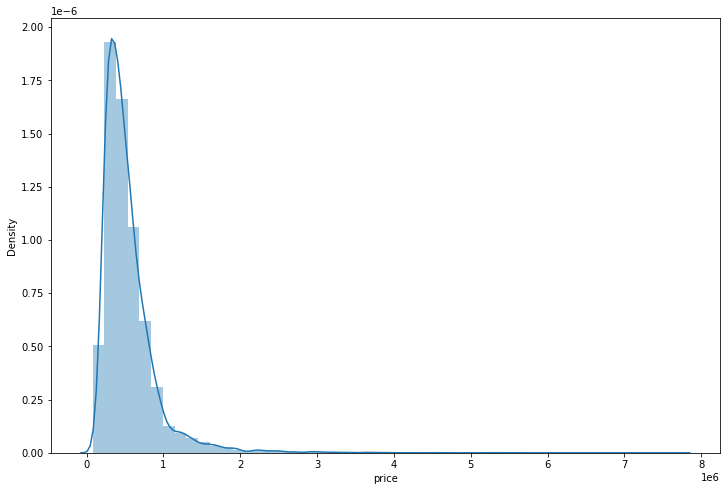

In [6]:
plt.figure(figsize=(12,8))
sns.distplot(housing_df['price'])

Create a countplot based on number of bedrooms. We can see most houses have 3-4 bedrooms

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

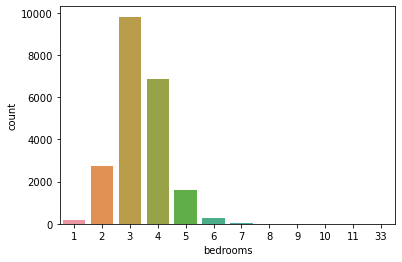

In [7]:
sns.countplot(housing_df['bedrooms'])

Scatter plot of price vs square footage. The higher the square footage, the higher the price

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

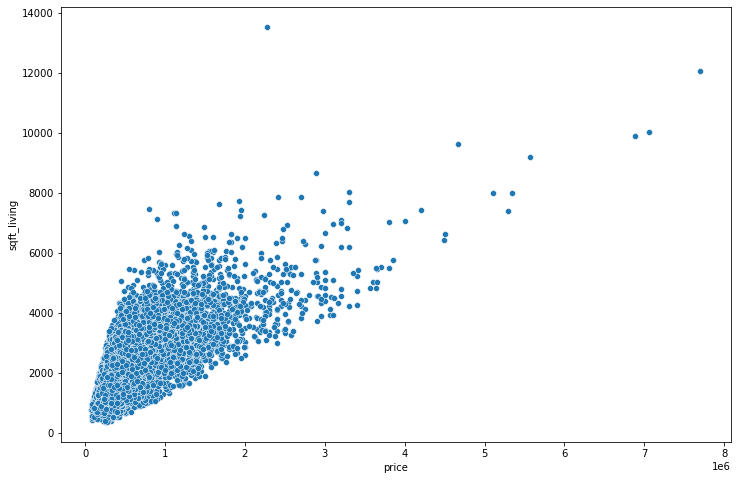

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=housing_df)

# Geographical Properties 

Let's create a scatterplot of latitude vs longitude with the hue being based on price. We can see the geographical shape of the county based on this plot. More expensive properties tend to lie along the coast and in the center

<AxesSubplot:xlabel='long', ylabel='lat'>

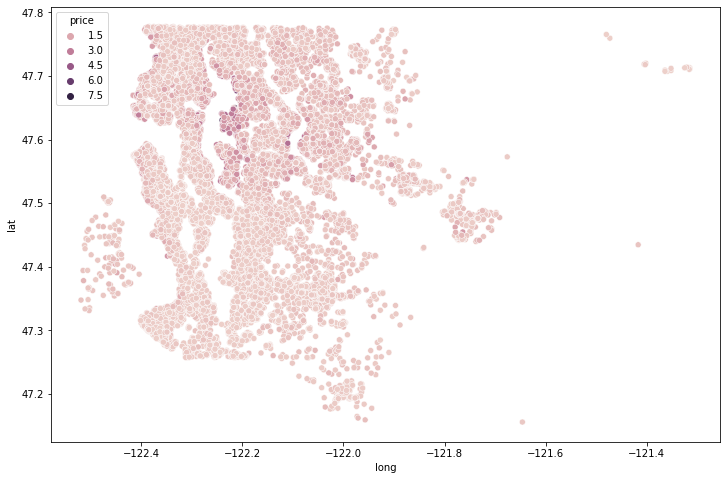

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=housing_df,hue='price')

Sort the dataframe by price in descending order

In [10]:
housing_df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


# Feature Engineering from Date

Let's first convert our existing date column from a string into a datetime object. This way we can extract key information from the date including the month and year.

In [11]:
housing_df['date'] = pd.to_datetime(housing_df['date'])

Now that we have our date converted to a datetime object, we can extract the month and a year and store those vaulues in their respective columns

In [12]:
housing_df['month'] = housing_df['date'].apply(lambda date:date.month)
housing_df['year'] = housing_df['date'].apply(lambda date:date.year)

Let's plot the average price based on the month to see a visual representation of their relationship

<AxesSubplot:xlabel='month'>

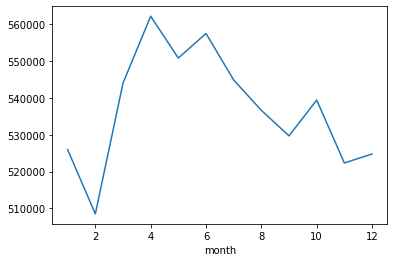

In [13]:
housing_df.groupby('month').mean()['price'].plot()

Now that we have extracted the month and year columns into their own respective columns, we can drop the date column

In [14]:
housing_df = housing_df.drop('date',axis=1)

# Train Test Split

Split our data into testing and training data. Our X array will be the features to train on, and our y array (the value we are trying to predict), will be the price

In [15]:
X = housing_df.drop('price',axis=1).values
y = housing_df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Scaling

In [16]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(15117, 21)

In [18]:
X_test.shape

(6480, 21)

# Creating a Model

In [19]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [20]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 437924047803.7333 - val_loss: 418842509312.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 433192058880.0000 - val_loss: 411826290688.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 422447154244.2667 - val_loss: 349745807360.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 326428928955.7333 - val_loss: 179891175424.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 146794298845.8667 - val_loss: 100357857280.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 113464333038.9333 - val_loss: 97865670656.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 101902714470.4000 - val_loss: 96027443200.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94491643221.3333 - val_loss: 94107590656.0000
Epoch 9/400
119/119 

119/119 [==============================] - 0s 2ms/step - loss: 35538327313.0667 - val_loss: 34320017408.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 34117449437.8667 - val_loss: 34113429504.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 33084762982.4000 - val_loss: 34015694848.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 35418587716.2667 - val_loss: 33812594688.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 33162935671.4667 - val_loss: 33659787264.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 33026764868.2667 - val_loss: 33542367232.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 33403915724.8000 - val_loss: 33397563392.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 33842817894.4000 - val_loss: 33450704896.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 29903938116.2667 - val_loss: 29741836288.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 29679922619.7333 - val_loss: 29708136448.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 30000854749.8667 - val_loss: 29802930176.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 29823070668.8000 - val_loss: 29770700800.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 29096756019.2000 - val_loss: 30011420672.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 29136836266.6667 - val_loss: 29576349696.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 30278080648.5333 - val_loss: 29644490752.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 28129420561.0667 - val_loss: 29597476864.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 26300193800.5333 - val_loss: 28152129536.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 27984740044.8000 - val_loss: 28063705088.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 27311512627.2000 - val_loss: 28002359296.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 28392827340.8000 - val_loss: 27933562880.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 27101603652.2667 - val_loss: 27966935040.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 28073452680.5333 - val_loss: 27972677632.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 29064914432.0000 - val_loss: 27917541376.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 28474758638.9333 - val_loss: 27873288192.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 26014432947.2000 - val_loss: 26711996416.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 27743850427.7333 - val_loss: 26575927296.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 26206698120.5333 - val_loss: 26461083648.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 25209972906.6667 - val_loss: 26670110720.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 26316733969.0667 - val_loss: 26581166080.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 26939327129.6000 - val_loss: 26556325888.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 26172675635.2000 - val_loss: 26446503936.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 26742046976.0000 - val_loss: 26436818944.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 24360638685.8667 - val_loss: 25495369728.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 25395833036.8000 - val_loss: 25731954688.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 25419554048.0000 - val_loss: 25281273856.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 24653496251.7333 - val_loss: 25566681088.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 28835610094.9333 - val_loss: 25412732928.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 25171741491.2000 - val_loss: 25319952384.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 25420959880.5333 - val_loss: 25472692224.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 24473919249.0667 - val_loss: 25464592384.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 22928004300.8000 - val_loss: 24446617600.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 24575179656.5333 - val_loss: 24627707904.0000


We can now create a dataframe of the losses and plot the results

<AxesSubplot:>

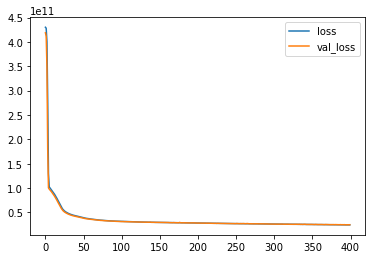

In [21]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

Predicting on Brand New Data

In [22]:
X_test

array([[0.15903386, 0.1       , 0.08      , ..., 0.00887725, 0.63636364,
        0.        ],
       [0.11045592, 0.3       , 0.36      , ..., 0.00993734, 0.81818182,
        0.        ],
       [0.53936987, 0.2       , 0.24      , ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.74293027, 0.1       , 0.08      , ..., 0.00506255, 1.        ,
        0.        ],
       [0.56820743, 0.3       , 0.2       , ..., 0.00774485, 0.09090909,
        1.        ],
       [0.7473301 , 0.3       , 0.32      , ..., 0.0196531 , 0.45454545,
        0.        ]])

In [23]:
predictions = model.predict(X_test)

In [24]:
mean_absolute_error(y_test,predictions)

96891.80269097222

In [25]:
np.sqrt(mean_squared_error(y_test,predictions))

156932.16588703173

In [26]:
explained_variance_score(y_test,predictions)

0.8150541123977059

In [27]:
housing_df['price'].mean()

540296.5735055795

In [28]:
housing_df['price'].median()

450000.0

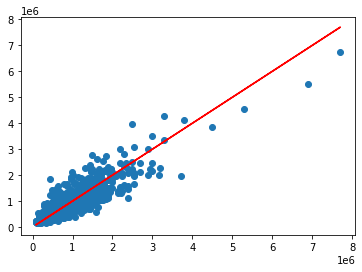

In [29]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

# Predicting on a brand new house

In [30]:
single_house = housing_df.drop('price',axis=1).iloc[0]

In [32]:
single_house = scaler.transform(single_house.values.reshape(-1, 21))

In [33]:
single_house

array([[0.72432505, 0.2       , 0.08      , 0.08376422, 0.00310751,
        0.        , 0.        , 0.        , 0.5       , 0.4       ,
        0.10785619, 0.        , 0.47826087, 0.        , 0.89393939,
        0.57149751, 0.21760797, 0.16193426, 0.00582059, 0.81818182,
        0.        ]])

In [34]:
model.predict(single_house)

array([[260498.8]], dtype=float32)

In [35]:
housing_df.iloc[0]

id               7.129301e+09
price            2.219000e+05
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
zipcode          9.817800e+04
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
month            1.000000e+01
year             2.014000e+03
Name: 0, dtype: float64